In [1]:
# encoding: utf-8
import pandas as pd
import numpy as np
import scipy.optimize as spo
from math import sqrt
import matplotlib


def minus_sharp_ratio(expect, var):
    """计算夏普比率"""
    return lambda x: -np.dot(x, expect) / sqrt(np.dot(x, var).dot(x))


def optimize(expect, var):
    """传入期望收益率向量和协方差矩阵
       返回最优权重向量
    """
    x0 = np.ones(len(expect)) / float(len(expect))

    fun = lambda x: -np.dot(x, expect) / sqrt(np.dot(x, var).dot(x))
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bnds = [(0, 1)] * len(expect)
    res = spo.minimize(minus_sharp_ratio(expect, var), x0, constraints=cons, bounds=bnds, tol=1e-6)
    return res.x


data = pd.read_excel(u"..\\data\\index_ret.xlsx", sheetname=0)
# data 预处理
data = data.iloc[:,[i for i in range(len(data.columns)-1)]]
base = pd.read_excel(u"..\\data\\index_ret.xlsx", sheetname=1)
data.set_index(["date"], inplace=True)
base.set_index(["date"], inplace=True)
ret = pd.DataFrame(columns=[i for i in range(1, 21)], index=data.index)
for cycle in range(1, 40):
    for i in range(cycle):
        ret.ix[i, cycle] = base.iloc[i, 0]
        opt_w = []
    for i in range(cycle, len(data)):
        if i % cycle == 0:
            # 计算最近一个时间窗口的期望收益率和协方差
            expect = data.iloc[i - cycle:i, :].mean() * 250
            var = data.cov() * 250
            opt_w = optimize(expect, var)
        ret.ix[i, cycle] = np.dot(opt_w, data.ix[i, :].values)
ret = ret.join(base)
ret.to_excel("ret.xlsx")
# 将ret转换为净值曲线
ret = ret.astype(float)
value = (np.exp(ret).cumprod())
value.to_excel("value.xlsx")

In [4]:
value

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,037.CS
date,,,,,,,,,,,,,,,,,,,,,
2009-01-06,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,...,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977,1.000977
2009-01-07,1.002142,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,...,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000,1.002000
2009-01-08,1.002568,1.002427,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619,...,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619,1.002619
2009-01-09,1.004060,1.002693,1.003301,1.003207,1.003207,1.003207,1.003207,1.003207,1.003207,1.003207,...,1.003207,1.003207,1.003207,1.003207,1.003207,1.003207,1.003207,1.003207,1.003207,1.003207
2009-01-12,1.005216,1.003949,1.003848,1.004298,1.002794,1.002794,1.002794,1.002794,1.002794,1.002794,...,1.002794,1.002794,1.002794,1.002794,1.002794,1.002794,1.002794,1.002794,1.002794,1.002794
2009-01-13,1.005749,1.004462,1.003934,1.004701,1.003326,0.998748,0.998748,0.998748,0.998748,0.998748,...,0.998748,0.998748,0.998748,0.998748,0.998748,0.998748,0.998748,0.998748,0.998748,0.998748
2009-01-14,1.005672,1.004454,1.003926,1.004520,1.003318,0.998740,0.994869,0.994869,0.994869,0.994869,...,0.994869,0.994869,0.994869,0.994869,0.994869,0.994869,0.994869,0.994869,0.994869,0.994869
2009-01-15,1.004309,1.003092,1.002565,1.002899,1.001958,0.997386,0.993521,0.991441,0.991441,0.991441,...,0.991441,0.991441,0.991441,0.991441,0.991441,0.991441,0.991441,0.991441,0.991441,0.991441
2009-01-16,1.002897,1.001682,1.001935,1.002269,1.001329,0.996760,0.992897,0.990818,0.988723,0.988723,...,0.988723,0.988723,0.988723,0.988723,0.988723,0.988723,0.988723,0.988723,0.988723,0.988723


In [7]:
# 查看夏普比率
sp = ret.mean()/ret.std()*np.sqrt(250)
sp

1         3.111906
2         3.317990
3         2.528123
4         2.823105
5         1.647086
6         2.574716
7         1.746761
8         1.596805
9         1.167564
10        1.325934
11        1.945984
12        1.195274
13        1.450828
14        2.302673
15        1.502226
16        1.255216
17        1.415381
18        2.020468
19        2.551337
20        3.000201
21        1.725716
22        2.878715
23        3.004647
24        2.011571
25        2.235491
26        2.162493
27        2.583781
28        1.606326
29        2.543338
30        3.150592
31        2.537750
32        3.159429
33        2.574445
34        2.230358
35        2.375891
36        2.085026
37        2.115653
38        2.489367
39        2.077777
037.CS    1.741995
dtype: float64

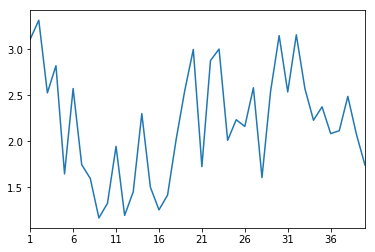

In [13]:
% matplotlib inline
sp.plot()

从上图中我们看到，夏普比率和频率的关系并不稳定，中间有很大的跳变，因此数据结果可能有很大的偶然性

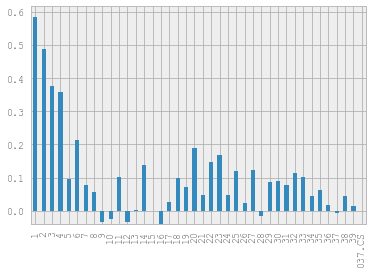

In [18]:
# 绘制超额收益率柱形图
(value.iloc[-1,:]-value.iloc[-1,-1]).plot(kind='bar')

从这张图我们看到，几乎所有的超额收益率都是为正，且即便是跑输基准，幅度也不大

In [22]:
obj = pd.Series([13,4,6,-2,3,6,19])
obj.rank(ascending=False, method='max')

0    2.0
1    5.0
2    4.0
3    7.0
4    6.0
5    4.0
6    1.0
dtype: float64

In [37]:
data.iloc[0:1,:].sum().rank()

038B.CS     9.0
038C.CS     6.0
038D.CS     4.0
038E.CS    14.0
038F.CS    15.0
042B.CS    12.0
042C.CS    10.0
042D.CS    11.0
042E.CS    13.0
042F.CS    16.0
064B.CS     7.0
064C.CS     1.0
054B.CS     5.0
054C.CS     3.0
054D.CS     8.0
054E.CS     2.0
dtype: float64